In [1]:
import pandas
import numpy 
import matplotlib
import matplotlib.pyplot as plt

import seaborn 

from sklearn import decomposition
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, validation_curve, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#from auxCode import *
%matplotlib inline

In [2]:
data_frame = pandas.read_csv(filepath_or_buffer='cal-housing.csv')


In [3]:
column_to_predict = 'median_house_value'
categories_columns = ['ocean_proximity']
numerics_columns = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]


In [4]:
#outilers 

outliers = data_frame[data_frame[column_to_predict] == 500001].index 
print(f'There are {len(outliers)} outliers')
data_frame.drop(outliers, inplace=True)


There are 965 outliers


In [5]:
data_frame.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
#missing values 
for c in data_frame.columns:
    if data_frame[c].hasnans:
        m = data_frame[c].mean()
        data_frame[c].fillna(value=m, inplace=True)

In [7]:
#categorical features
useLabelEncoder = False
if useLabelEncoder:
    labelencoder = LabelEncoder()

    for c in categories_columns:
        c_name = c + '_cat'
        data_frame[c_name] = labelencoder.fit_transform(data_frame[c])
        numerics_columns.append(c_name)

    data_frame.drop(columns=categories_columns, inplace=True)    
else:
    data_frame['ocean_proximity'].replace(['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], [1, 10, 50, 100, 500], inplace=True)
    numerics_columns.append('ocean_proximity')



In [8]:
columns_to_remove = []
columns_to_use = list(data_frame.columns)

for u in columns_to_remove:
    columns_to_use.remove(u)
    if numerics_columns.count(u) > 0:
        numerics_columns.remove(u)
        
data_frame.drop(columns=columns_to_remove, inplace=True)

X = data_frame[numerics_columns]
y = data_frame[column_to_predict]



In [9]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,100
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,100
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,100
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,100
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,100
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1


In [10]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 19675, dtype: float64

In [11]:
useMinMaxScaler = True
if useMinMaxScaler:
    column_to_predict_idx = data_frame.columns.get_loc(column_to_predict)
    cols = list(range(0, data_frame.shape[1]))
    cols.remove(column_to_predict_idx)

    scaler = MinMaxScaler()
    scaler.fit(data_frame)
    data_frame = scaler.transform(data_frame)    
    
data_frame = pandas.DataFrame(data_frame, columns=columns_to_use)

X = data_frame[numerics_columns]
y = data_frame[column_to_predict]


In [31]:
learner = Ridge(alpha=1e-100 , fit_intercept=False, normalize=True, solver='sparse_cg')
#RMS = 'neg_mean_squared_error'
#learner = LinearRegression(normalize=True)
RMS = 'neg_mean_squared_error'

Cross-Validate risk etimete is 0.02 

In [32]:
scores = cross_val_score(learner, X, y, cv=5, scoring=RMS)
numpy.round(-scores.mean(), decimals=2)

0.02

test set 30%

In [33]:
sizes = range(1, 5902, 1000)
train_size, train_score, val_score = learning_curve(learner, X, y, train_sizes=sizes, cv=5, scoring=RMS, shuffle = True) 

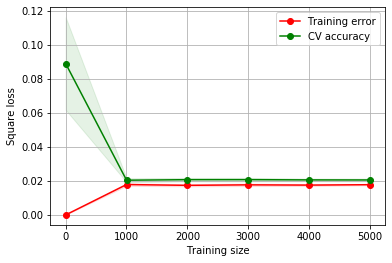

In [34]:
train_score_mean = -numpy.mean(train_score, axis=1)
train_score_std = numpy.std(train_score, axis=1)
val_score_mean = -numpy.mean(val_score, axis=1)
val_score_std = numpy.std(val_score, axis=1)
plt.grid()
plt.fill_between(sizes, train_score_mean - train_score_std,
                 train_score_mean + train_score_std, alpha=0.1,
                 color="r")
plt.fill_between(sizes, val_score_mean - val_score_std,
                 val_score_mean + val_score_std, alpha=0.1, color="g")
plt.plot(sizes, train_score_mean, 'o-', color="r",
         label="Training error")
plt.plot(sizes, val_score_mean, 'o-', color="g",
         label="CV accuracy")
plt.legend()
plt.xlabel('Training size')
plt.ylabel('Square loss')
plt.show()


In [ ]:
alpha_vals = numpy.logspace(-3, -1 ,500)
train_score, val_score = validation_curve(Ridge(normalize=True), X, y, 'alpha', alpha_vals, cv=5, scoring=RMS)

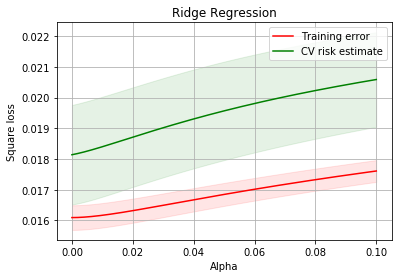

In [65]:
plt.title('Ridge Regression')
train_score_mean = -numpy.mean(train_score, axis=1)
train_score_std = numpy.std(train_score, axis=1)
val_score_mean = -numpy.mean(val_score, axis=1)
val_score_std = numpy.std(val_score, axis=1)
plt.grid()
plt.fill_between(alpha_vals, train_score_mean - train_score_std,
                 train_score_mean + train_score_std, alpha=0.1,
                 color="r")
plt.fill_between(alpha_vals, val_score_mean - val_score_std,
                 val_score_mean + val_score_std, alpha=0.1, color="g")
plt.plot(alpha_vals, train_score_mean, color="r",
         label="Training error")
plt.plot(alpha_vals, val_score_mean, color="g",
         label="CV risk estimate")
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Square loss')
plt.show()

